#### Hello!! Doing the tri met GTFS a little differently

###### gonna combine the data frames and then do my analysis. We'll see.

Find the data description/download link here --> https://transitfeeds.com/p/trimet/43/20231016

In [1]:
import matplotlib as plt
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import geopandas

import gtfs_kit as gt

import pydeck as pdk

##### times = old[['A', 'C', 'D']].copy()

In [2]:
feed = gt.read_feed('C:/Users/aaron/Code/Data/GTFS/trimet_2023_10_16.zip', dist_units = 'mi')

In [3]:
cal_dates = feed.calendar_dates

cal_dates['date'] = '20231105'
cal_dates

service_id      date  exception_type
0       C.658  20231105               2
1       D.658  20231105               2
2       Q.658  20231105               2
3       Q.658  20231105               2
4       Q.656  20231105               2
5       Q.656  20231105               2
6       W.658  20231105               2
7       W.658  20231105               2
8       W.656  20231105               2
9       W.656  20231105               2
10      W.656  20231105               2
11      X.658  20231105               1
12      7.658  20231105               2
13      A.658  20231105               2
14      A.658  20231105               2
15      z.658  20231105               1
16      f.658  20231105               1
17      s.658  20231105               1
18      M.656  20231105               1

In [4]:
### AS I UNDERSTAND IT, SERVICE ID 'C.658' indicated november 5. See feed.calendar_dates. Idk anything.
nov_5_service_ids = ['C.658', 'D.658', 'Q.658', 'Q.656', 'W.658', 'W.656', 'X.658', '7.658', 'A.658', 'z.658', 'f.658', 's.658', 'M.656']



nov_5_trips = feed.trips[feed.trips['service_id'].isin(nov_5_service_ids)]

In [5]:
nov_5_trips

route_id service_id   trip_id trip_short_name  direction_id block_id  \
4            1      W.658  12936727             NaN             0      169   
5            1      W.658  12936728             NaN             0      170   
6            1      s.658  12936729             NaN             0      169   
7            1      s.658  12936730             NaN             0      170   
8            1      W.658  12936731             NaN             1      167   
...        ...        ...       ...             ...           ...      ...   
64111      291      s.658  12962899             NaN             0     7217   
64112      291      s.658  12962900             NaN             0     7244   
64113      291      M.656  12931278             NaN             0      808   
64116      291      W.656  12931281             NaN             0     7220   
64117      291      W.656  12931282             NaN             0     3337   

      shape_id  trip_type  wheelchair_accessible  
4       551325        NaN                      1  
5       551325        NaN                      1  
6       551325        NaN                      1  
7       551325        NaN                      1  
8       551326        NaN                      1  
...        ...        ...                    ...  
64111   551776        NaN                      1  
64112   551776        NaN                      1  
64113   550999        NaN                      1  
64116   550998        NaN                      1  
64117   550998        NaN                      1  

[26343 rows x 9 columns]

In [6]:
stop_times = feed.stop_times

In [7]:
stops = feed.stops

In [8]:
### make a stop times frame with only a single date.

stop_times_single_day = pd.merge(left = stop_times, right = nov_5_trips[['trip_id', 'service_id']], left_on = 'trip_id', right_on='trip_id')

In [9]:
stop_times_single_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394260 entries, 0 to 1394259
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_id              1394260 non-null  object 
 1   arrival_time         1394260 non-null  object 
 2   departure_time       1394260 non-null  object 
 3   stop_id              1394260 non-null  object 
 4   stop_sequence        1394260 non-null  int64  
 5   stop_headsign        1394260 non-null  object 
 6   pickup_type          1394260 non-null  int64  
 7   drop_off_type        1394260 non-null  int64  
 8   shape_dist_traveled  1394260 non-null  float64
 9   timepoint            1394260 non-null  int64  
 10  continuous_drop_off  90 non-null       float64
 11  continuous_pickup    90 non-null       float64
 12  service_id           1394260 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 148.9+ MB


In [10]:
nov_5_trips.head(3)

route_id service_id   trip_id trip_short_name  direction_id block_id  \
4        1      W.658  12936727             NaN             0      169   
5        1      W.658  12936728             NaN             0      170   
6        1      s.658  12936729             NaN             0      169   

  shape_id  trip_type  wheelchair_accessible  
4   551325        NaN                      1  
5   551325        NaN                      1  
6   551325        NaN                      1

In [11]:
stop_times.head(1)

trip_id arrival_time departure_time stop_id  stop_sequence  \
0  12845452     15:10:00       15:10:00   13170              1   

                         stop_headsign  pickup_type  drop_off_type  \
0  Vermont Shattuck Loop via Maplewood            0              1   

   shape_dist_traveled  timepoint  continuous_drop_off  continuous_pickup  
0                  0.0          1                  NaN                NaN

In [12]:
stops.head(1)

stop_id stop_code         stop_name         tts_stop_name  \
0       2         2  A Ave & Chandler  ae avenue & chandler   

                                   stop_desc   stop_lat    stop_lon zone_id  \
0  Eastbound stop in Lake Oswego (Stop ID 2)  45.420609 -122.675671       B   

                         stop_url  location_type parent_station direction  \
0  https://trimet.org/home/stop/2              0            NaN      East   

   position  
0  Nearside

In [13]:
stop_times_merged = pd.merge(left = stop_times, right = stops[['stop_id', 'stop_name', 'stop_desc', 'stop_lat', 'stop_lon']], left_on = 'stop_id', right_on='stop_id')

In [14]:
stop_times_merged.head(2)

trip_id arrival_time departure_time stop_id  stop_sequence  \
0  12845452     15:10:00       15:10:00   13170              1   
1  12845453     15:15:00       15:15:00   13170              1   

                         stop_headsign  pickup_type  drop_off_type  \
0  Vermont Shattuck Loop via Maplewood            0              1   
1  Vermont Shattuck Loop via Maplewood            0              1   

   shape_dist_traveled  timepoint  continuous_drop_off  continuous_pickup  \
0                  0.0          1                  NaN                NaN   
1                  0.0          1                  NaN                NaN   

                  stop_name                                    stop_desc  \
0  SW Broadway & W Burnside  Northbound stop in Portland (Stop ID 13170)   
1  SW Broadway & W Burnside  Northbound stop in Portland (Stop ID 13170)   

    stop_lat    stop_lon  
0  45.522894 -122.677232  
1  45.522894 -122.677232

In [15]:
stop_times_merged.nunique()

trip_id                64119
arrival_time           73506
departure_time         73499
stop_id                 6310
stop_sequence            137
stop_headsign            221
pickup_type                3
drop_off_type              3
shape_dist_traveled    11963
timepoint                  2
continuous_drop_off        1
continuous_pickup          1
stop_name               4411
stop_desc               6310
stop_lat                6142
stop_lon                6222
dtype: int64

In [16]:
stop_freq_series = stop_times_single_day.stop_id.value_counts()

stop_freq_series = stop_freq_series.to_frame().reset_index()

stop_freq_series = stop_freq_series.rename(columns = {"index": "Stop_Id", "stop_id":"stops_per_day"})

stop_freq_series.head(3)

Stop_Id  stops_per_day
0   13248           2937
1    9654           2212
2    9301           2034

In [17]:
stop_location_and_frequency = pd.merge(left = stops, right = stop_freq_series, left_on = 'stop_id', right_on='Stop_Id')

In [19]:
stop_location_and_frequency_geo = geopandas.GeoDataFrame(stop_location_and_frequency, geometry=geopandas.points_from_xy(
    stop_location_and_frequency.stop_lon, stop_location_and_frequency.stop_lat), crs = 4326)

<Axes: >

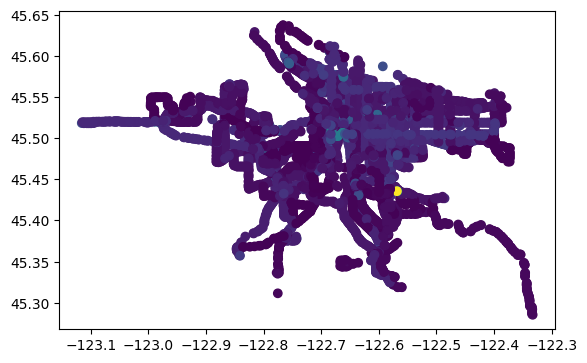

In [20]:
stop_location_and_frequency_geo.plot(column = 'stops_per_day')

In [23]:
tt = {"stop_name", "stops_per_day"}

stop_location_and_frequency_geo.explore(column = 'stops_per_day', tooltip = tt)